In [17]:
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# 加载数据集，你需要把数据放到目录中
data = pd.read_csv("/Users/bingqihou/Documents/DataAnalysis54/breast_cancer_data/data.csv")
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [19]:
data.drop("id",axis=1,inplace=True)

In [20]:
# 将B良性替换为0，M恶性替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

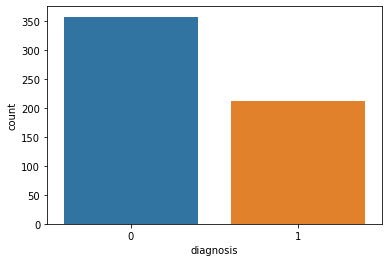

In [21]:
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label="Count")
plt.show()

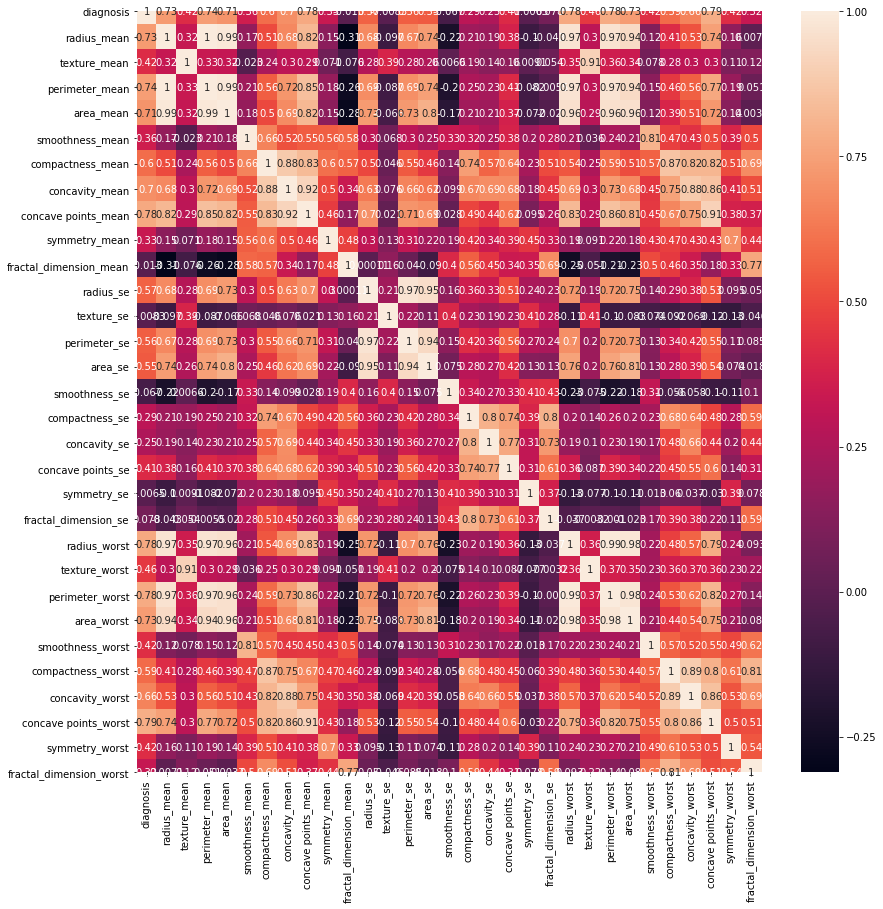

In [22]:
# 用热力图呈现features_mean字段之间的相关性
corr = data.corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [27]:
#特征选择
features=list(data.columns[1:31])

In [28]:
# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features]
train_y=train['diagnosis']
test_X= test[features]
test_y =test['diagnosis']

In [29]:
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [30]:
# 创建SVM分类器
model1 = svm.SVC()
model2=svm.LinearSVC()
# 用训练集做训练
model1.fit(train_X,train_y)
model2.fit(train_X,train_y)
# 用测试集做预测
prediction1=model1.predict(test_X)
prediction2=model2.predict(test_X)
print('准确率: ', metrics.accuracy_score(test_y,prediction1))
print('线性准确率：',metrics.accuracy_score(test_y,prediction2))

准确率:  0.9883040935672515
线性准确率： 0.9766081871345029
